# Game of Life

In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns
from src.game_of_life import GameOfLife

Simple random board

In [9]:
init_board = [[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]
game = GameOfLife(init_board)
game.run(10)

In [10]:
game.board

[[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]]

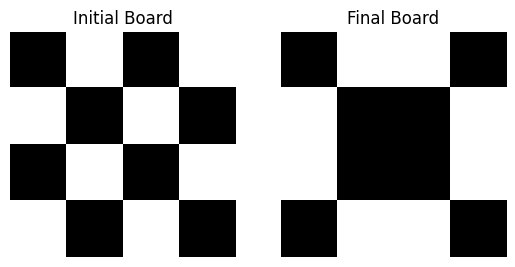

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(init_board, cmap='gray', interpolation='nearest')
ax1.set_title('Initial Board')
ax1.axis('off')
ax2.imshow(game.board, cmap='gray', interpolation='nearest')
ax2.set_title('Final Board')
ax2.axis('off')
plt.show()

## Visualize Updates in Real Time

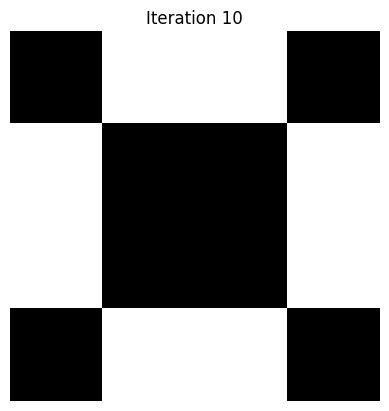

In [25]:
init_board = [[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]
game = GameOfLife(init_board)

for i in range(10):
    clear_output()
    fig, ax = plt.subplots()
    ax.axis('off')

    game.run(1)
    ax.imshow(game.board, cmap='gray', interpolation='nearest')
    ax.set_title(f'Iteration {i+1}')
    plt.show()
    time.sleep(0.2)

Create a more complicated and random board

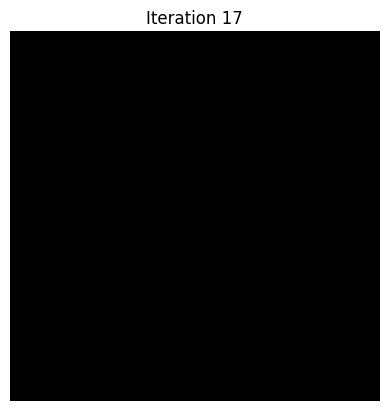

KeyboardInterrupt: 

In [40]:
board = np.random.choice([0, 1], size=(10, 10), p=[0.5, 0.5])
game = GameOfLife(board)

for i in range(100):
    clear_output()
    fig, ax = plt.subplots()
    ax.axis('off')

    game.run(1)
    ax.imshow(game.board, cmap='gray', interpolation='nearest')
    ax.set_title(f'Iteration {i+1}')
    plt.show()
    time.sleep(0.1)

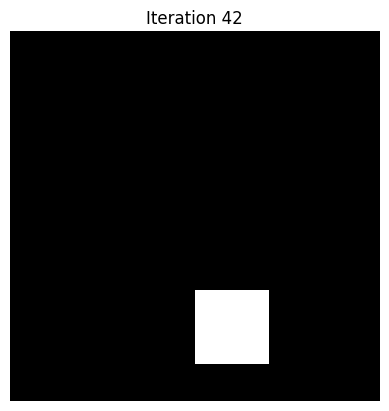

KeyboardInterrupt: 

In [52]:
board = np.random.choice([0, 1], size=(10, 10), p=[0.5, 0.5])
game = GameOfLife(board)

for i in range(100):
    clear_output()
    fig, ax = plt.subplots()
    ax.axis('off')

    game.run(1)
    ax.imshow(game.board, cmap='gray', interpolation='nearest')
    ax.set_title(f'Iteration {i+1}')
    plt.show()
    time.sleep(0.1)

In [110]:
saved_boards = []

for _ in range(1000):
    temp_boards = []
    board = np.random.choice([0, 1], size=(10, 10), p=[0.5, 0.5])
    game = GameOfLife(board)
    for i in range(150):
        game.run(1)

        if i > 1:
            if np.array_equal(game.board, temp_boards[-1]) or np.array_equal(game.board, temp_boards[-2]):
                saved_boards.append((i, game.board))
                break
        temp_boards.append(game.board)
    
    if i == 149:
        max_board = temp_boards
        saved_boards.append((i, game.board))

In [97]:
len(saved_boards)

1000

In [111]:
live_squares = [np.sum(board) for _, board in saved_boards]
iterations = [i for i, _ in saved_boards]
df = pd.DataFrame({'iterations': iterations, 'live_squares': live_squares})
df.head()

,iterations,live_squares
0,11,4
1,22,11
2,74,0
3,29,9
4,21,4


In [112]:
df.sort_values("iterations", ascending=False).head()

,iterations,live_squares
260,149,18
326,149,9
964,149,14
551,149,3
537,149,22


<Axes: xlabel='iterations', ylabel='Count'>

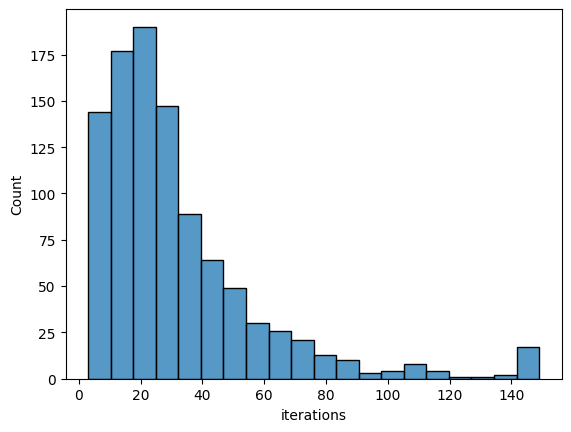

In [113]:
sns.histplot(df['iterations'], bins=20)

The chart below shows a more complex cycle of ~ 3. I wonder what the maximum cycle time is here?

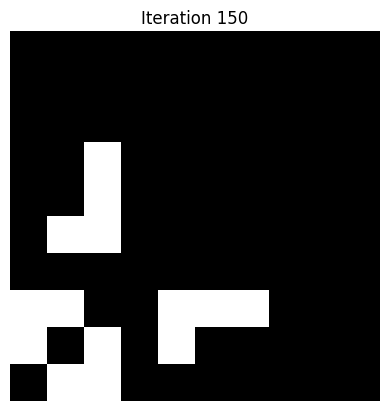

In [118]:
for i, b in enumerate(max_board):
    print(b)
    clear_output()
    fig, ax = plt.subplots()
    ax.axis('off')

    game.run(1)
    ax.imshow(b, cmap='gray', interpolation='nearest')
    ax.set_title(f'Iteration {i+1}')
    plt.show()
    time.sleep(0.1)

<Axes: xlabel='iterations', ylabel='Count'>

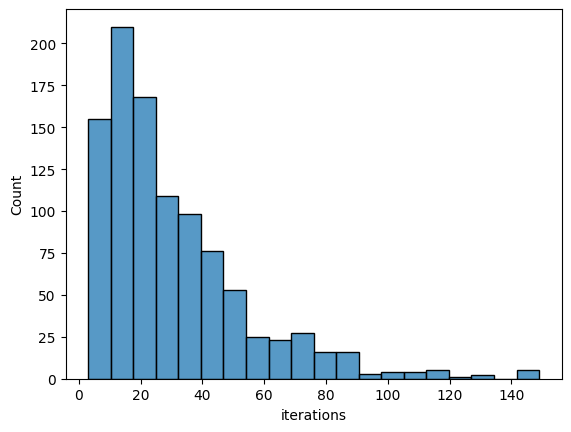

In [119]:
saved_boards = []

for _ in range(1000):
    temp_boards = []
    board = np.random.choice([0, 1], size=(10, 10), p=[0.5, 0.5])
    game = GameOfLife(board)
    for i in range(150):
        game.run(1)

        if i > 2:
            if np.array_equal(game.board, temp_boards[-1]) or np.array_equal(game.board, temp_boards[-2]) or np.array_equal(game.board, temp_boards[-3]):
                saved_boards.append((i, game.board))
                break
        temp_boards.append(game.board)
    
    if i == 149:
        max_board = temp_boards
        saved_boards.append((i, game.board))
        
live_squares = [np.sum(board) for _, board in saved_boards]
iterations = [i for i, _ in saved_boards]
df = pd.DataFrame({'iterations': iterations, 'live_squares': live_squares})
sns.histplot(df['iterations'], bins=20)

This creates a significantly more complex cycle. I wonder if it would go away if given more time?

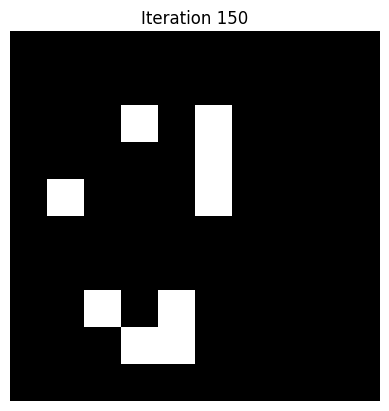

In [120]:
for i, b in enumerate(max_board):
    print(b)
    clear_output()
    fig, ax = plt.subplots()
    ax.axis('off')

    game.run(1)
    ax.imshow(b, cmap='gray', interpolation='nearest')
    ax.set_title(f'Iteration {i+1}')
    plt.show()
    time.sleep(0.1)

<Axes: xlabel='iterations', ylabel='Count'>

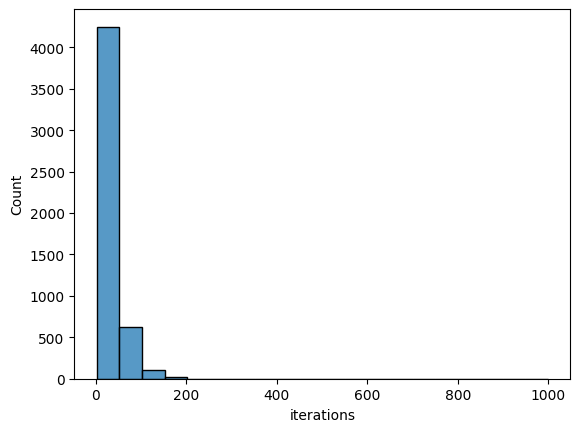

In [124]:
saved_boards = []
max_board = []
for _ in range(5000):
    temp_boards = []
    board = np.random.choice([0, 1], size=(10, 10), p=[0.5, 0.5])
    game = GameOfLife(board)
    for i in range(1000):
        game.run(1)

        if i > 2:
            if np.array_equal(game.board, temp_boards[-1]) or np.array_equal(game.board, temp_boards[-2]) or np.array_equal(game.board, temp_boards[-3]):
                saved_boards.append((i, game.board))
                break
        temp_boards.append(game.board)
    
    if i == 999:
        max_board = temp_boards
        saved_boards.append((i, game.board))
        
live_squares = [np.sum(board) for _, board in saved_boards]
iterations = [i for i, _ in saved_boards]
df = pd.DataFrame({'iterations': iterations, 'live_squares': live_squares})
sns.histplot(df['iterations'], bins=20)

In [125]:
df.sort_values("iterations", ascending=False).head()

,iterations,live_squares
4118,999,15
2913,208,0
1104,199,0
3252,196,0
4358,191,0


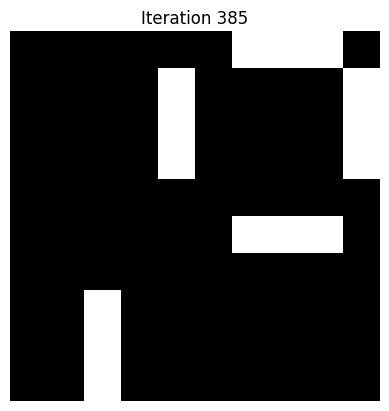

KeyboardInterrupt: 

In [ ]:
for i, b in enumerate(max_board):
    clear_output()
    fig, ax = plt.subplots()
    ax.axis('off')

    game.run(1)
    ax.imshow(b, cmap='gray', interpolation='nearest')
    ax.set_title(f'Iteration {i+1}')
    plt.show()
    time.sleep(0.1)

It looks like there is a single case of a more complex cycle...let's take it once step further and handle the last 5 boards

<Axes: xlabel='iterations', ylabel='Count'>

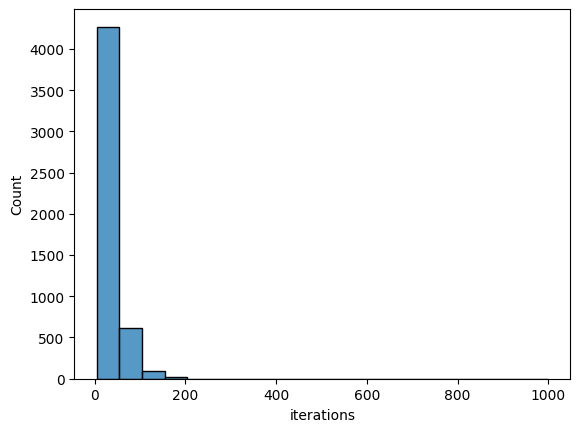

In [129]:
saved_boards = []
max_board = []
for _ in range(5000):
    temp_boards = []
    board = np.random.choice([0, 1], size=(10, 10), p=[0.5, 0.5])
    game = GameOfLife(board)
    for i in range(1000):
        game.run(1)

        if i > 4:
            if np.array_equal(game.board, temp_boards[-1]) or np.array_equal(game.board, temp_boards[-2]) or np.array_equal(game.board, temp_boards[-3]) or np.array_equal(game.board, temp_boards[-4]) or np.array_equal(game.board, temp_boards[-5]):
                saved_boards.append((i, game.board))
                break
        temp_boards.append(game.board)
    
    if i == 999:
        max_board = temp_boards
        saved_boards.append((i, game.board))
        
live_squares = [np.sum(board) for _, board in saved_boards]
iterations = [i for i, _ in saved_boards]
df = pd.DataFrame({'iterations': iterations, 'live_squares': live_squares})
sns.histplot(df['iterations'], bins=20)

In [130]:
df.sort_values("iterations", ascending=False).head()

,iterations,live_squares
247,999,17
3574,206,0
4905,204,0
1250,182,4
912,174,0


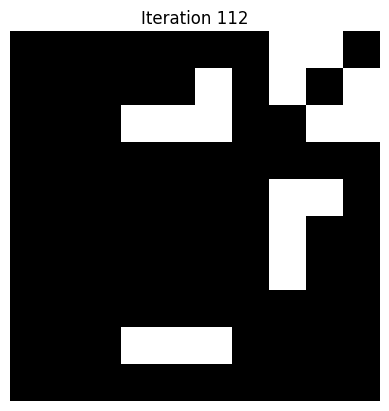

KeyboardInterrupt: 

In [ ]:
for i, b in enumerate(max_board):
    clear_output()
    fig, ax = plt.subplots()
    ax.axis('off')

    game.run(1)
    ax.imshow(b, cmap='gray', interpolation='nearest')
    ax.set_title(f'Iteration {i+1}')
    plt.show()
    time.sleep(0.1)

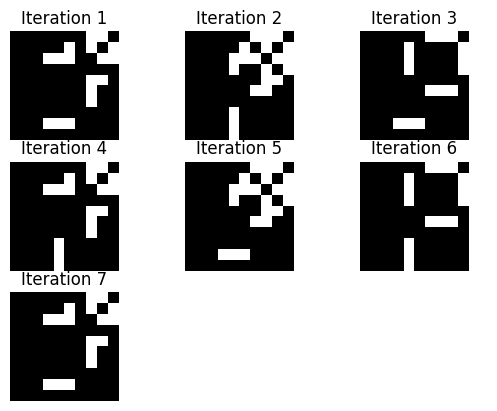

In [138]:
fig, ax = plt.subplots(3,3)
ax[0,0].imshow(max_board[45], cmap='gray', interpolation='nearest')
ax[0,0].set_title('Iteration 1')
ax[0,0].axis('off')
ax[0,1].imshow(max_board[46], cmap='gray', interpolation='nearest')
ax[0,1].set_title('Iteration 2')
ax[0,1].axis('off')
ax[0,2].imshow(max_board[47], cmap='gray', interpolation='nearest')
ax[0,2].set_title('Iteration 3')
ax[0,2].axis('off')
ax[1,0].imshow(max_board[48], cmap='gray', interpolation='nearest')
ax[1,0].set_title('Iteration 4')
ax[1,0].axis('off')
ax[1,1].imshow(max_board[49], cmap='gray', interpolation='nearest')
ax[1,1].set_title('Iteration 5')
ax[1,1].axis('off')
ax[1,2].imshow(max_board[50], cmap='gray', interpolation='nearest')
ax[1,2].set_title('Iteration 6')
ax[1,2].axis('off')
ax[2,0].imshow(max_board[51], cmap='gray', interpolation='nearest')
ax[2,0].set_title('Iteration 7')
ax[2,0].axis('off')
ax[2,1].axis('off')
ax[2,2].axis('off')
plt.show()

There's a 7 step cycle here with a blinker that rotates on bottom to create a more complex cycle